# Redundancy Matrix Visualization

This notebook generates a redundancy matrix heatmap showing the correlation between Access Points (APs).

**Input File:**
- `data/output_data/redundancy_scores/redundancy_matrix.csv` - Redundancy scores between all APs

## Setup: Imports and Configuration

In [16]:
# Add project root to Python path
import sys
from pathlib import Path

project_root = Path.cwd().parent.parent
sys.path.insert(0, str(project_root))

print(f"✓ Project root: {project_root}")

✓ Project root: c:\Users\AUC\Desktop\Thesis\Quantum-Optimization-In-AP-Selection


In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# Set publication-quality plotting defaults
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['font.size'] = 10
plt.rcParams['axes.linewidth'] = 1.5
plt.rcParams['xtick.major.width'] = 1.5
plt.rcParams['ytick.major.width'] = 1.5
plt.rcParams['xtick.major.size'] = 5
plt.rcParams['ytick.major.size'] = 5

sns.set_style('white')

print("✓ All libraries imported successfully")
print("✓ Publication-quality plotting configured (DPI=300)")

✓ All libraries imported successfully
✓ Publication-quality plotting configured (DPI=300)


## Load Redundancy Matrix Data

In [18]:
# Define paths
redundancy_dir = project_root / 'data' / 'output_data' / 'redundancy_scores'
importance_dir = project_root / 'data' / 'output_data' / 'importance_scores'
redundancy_file = redundancy_dir / 'redundancy_matrix.csv'
importance_file = importance_dir / 'average_importance_dict.csv'
output_dir = project_root / 'data' / 'results' / 'visualizations' / 'paper'
output_dir.mkdir(parents=True, exist_ok=True)

print("Loading data files...")

# Load the redundancy matrix
if not redundancy_file.exists():
    raise FileNotFoundError(f"Redundancy matrix file not found: {redundancy_file}")
redundancy_df = pd.read_csv(redundancy_file, index_col=0)
print(f"✓ Loaded redundancy matrix: {redundancy_df.shape[0]} x {redundancy_df.shape[1]}")

# Load average importance scores
if not importance_file.exists():
    raise FileNotFoundError(f"Average importance file not found: {importance_file}")
importance_df = pd.read_csv(importance_file)
print(f"✓ Loaded average importance scores: {len(importance_df)} APs")

# Filter for APs with non-zero importance
non_zero_aps = importance_df[importance_df['Score'] > 0]['AP'].tolist()
print(f"✓ Found {len(non_zero_aps)} APs with non-zero average importance")
print(f"  (Filtered out {len(importance_df) - len(non_zero_aps)} APs with zero importance)")

# Filter redundancy matrix to only include non-zero importance APs
redundancy_df_filtered = redundancy_df.loc[non_zero_aps, non_zero_aps]
print(f"\n✓ Filtered redundancy matrix: {redundancy_df_filtered.shape[0]} x {redundancy_df_filtered.shape[1]}")
print(f"✓ AP range: {redundancy_df_filtered.index[0]} to {redundancy_df_filtered.index[-1]}")
print(f"\n✓ Output directory: {output_dir}")

Loading data files...
✓ Loaded redundancy matrix: 520 x 520
✓ Loaded average importance scores: 520 APs
✓ Found 207 APs with non-zero average importance
  (Filtered out 313 APs with zero importance)

✓ Filtered redundancy matrix: 207 x 207
✓ AP range: WAP006 to WAP503

✓ Output directory: c:\Users\AUC\Desktop\Thesis\Quantum-Optimization-In-AP-Selection\data\results\visualizations\paper


## Data Inspection

In [19]:
# Display basic statistics
print("="*80)
print("REDUNDANCY MATRIX STATISTICS (Non-Zero Importance APs Only)")
print("="*80)
print(f"\nMatrix shape: {redundancy_df_filtered.shape}")
print(f"Total number of APs (with non-zero importance): {len(redundancy_df_filtered)}")
print(f"\nValue range: {redundancy_df_filtered.min().min():.4f} to {redundancy_df_filtered.max().max():.4f}")
print(f"Mean redundancy: {redundancy_df_filtered.mean().mean():.4f}")
print(f"Median redundancy: {redundancy_df_filtered.median().median():.4f}")

# Display first few rows/columns
print("\nFirst 5x5 section of the matrix:")
print(redundancy_df_filtered.iloc[:5, :5])

# Show some example APs included
print(f"\nExample APs included: {', '.join(redundancy_df_filtered.index[:10].tolist())}...")

REDUNDANCY MATRIX STATISTICS (Non-Zero Importance APs Only)

Matrix shape: (207, 207)
Total number of APs (with non-zero importance): 207

Value range: 0.0000 to 1.0000
Mean redundancy: 0.0977
Median redundancy: 0.0610

First 5x5 section of the matrix:
          WAP006    WAP008    WAP010    WAP011    WAP012
WAP006  1.000000  0.066817  0.026419  0.001711  0.012965
WAP008  0.066817  1.000000  0.038799  0.045017  0.043953
WAP010  0.026419  0.038799  1.000000  0.017800  0.017379
WAP011  0.001711  0.045017  0.017800  1.000000  0.582615
WAP012  0.012965  0.043953  0.017379  0.582615  1.000000

Example APs included: WAP006, WAP008, WAP010, WAP011, WAP012, WAP015, WAP016, WAP017, WAP021, WAP022...


## Full Redundancy Matrix Heatmap

Note: All AP labels are shown. If there are many APs, labels may be small or overlap.

In [ ]:
# Create full redundancy matrix heatmap (non-zero importance APs only)
fig, ax = plt.subplots(figsize=(16, 14))

# Determine tick frequency - show every Nth label
n_aps = len(redundancy_df_filtered)
tick_frequency = max(1, n_aps // 20)  # Show approximately 20 labels
# You can adjust this: e.g., tick_frequency = 10 to show every 10th AP

# Create heatmap with tick labels
sns.heatmap(
    redundancy_df_filtered,
    cmap='viridis',
    ax=ax,
    cbar_kws={'label': 'Absolute Pearson Correlation'},
    vmin=0,
    vmax=1,
    square=True,
    linewidths=0,
    xticklabels=tick_frequency,  # Show every Nth label
    yticklabels=tick_frequency   # Show every Nth label
)

ax.set_xlabel('Access Point (AP)', fontsize=14, fontweight='bold')
ax.set_ylabel('Access Point (AP)', fontsize=14, fontweight='bold')
ax.set_title(f'AP Redundancy Matrix - Non-Zero Importance APs ({len(redundancy_df_filtered)} APs)', 
             fontsize=16, fontweight='bold', pad=20)

# Rotate x-axis labels for better readability
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='center', fontsize=8)
ax.set_yticklabels(ax.get_yticklabels(), rotation=0, fontsize=8)

# Add colorbar styling
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=11)
cbar.set_label('Absolute Pearson Correlation', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.savefig(output_dir / 'redundancy_matrix_full.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"✓ Full redundancy matrix saved: redundancy_matrix_full.png")
print(f"  Showing every {tick_frequency} AP labels for clarity")

## Redundancy Matrix with Selected APs

To better visualize the patterns, we can select a subset of APs to display with labels.

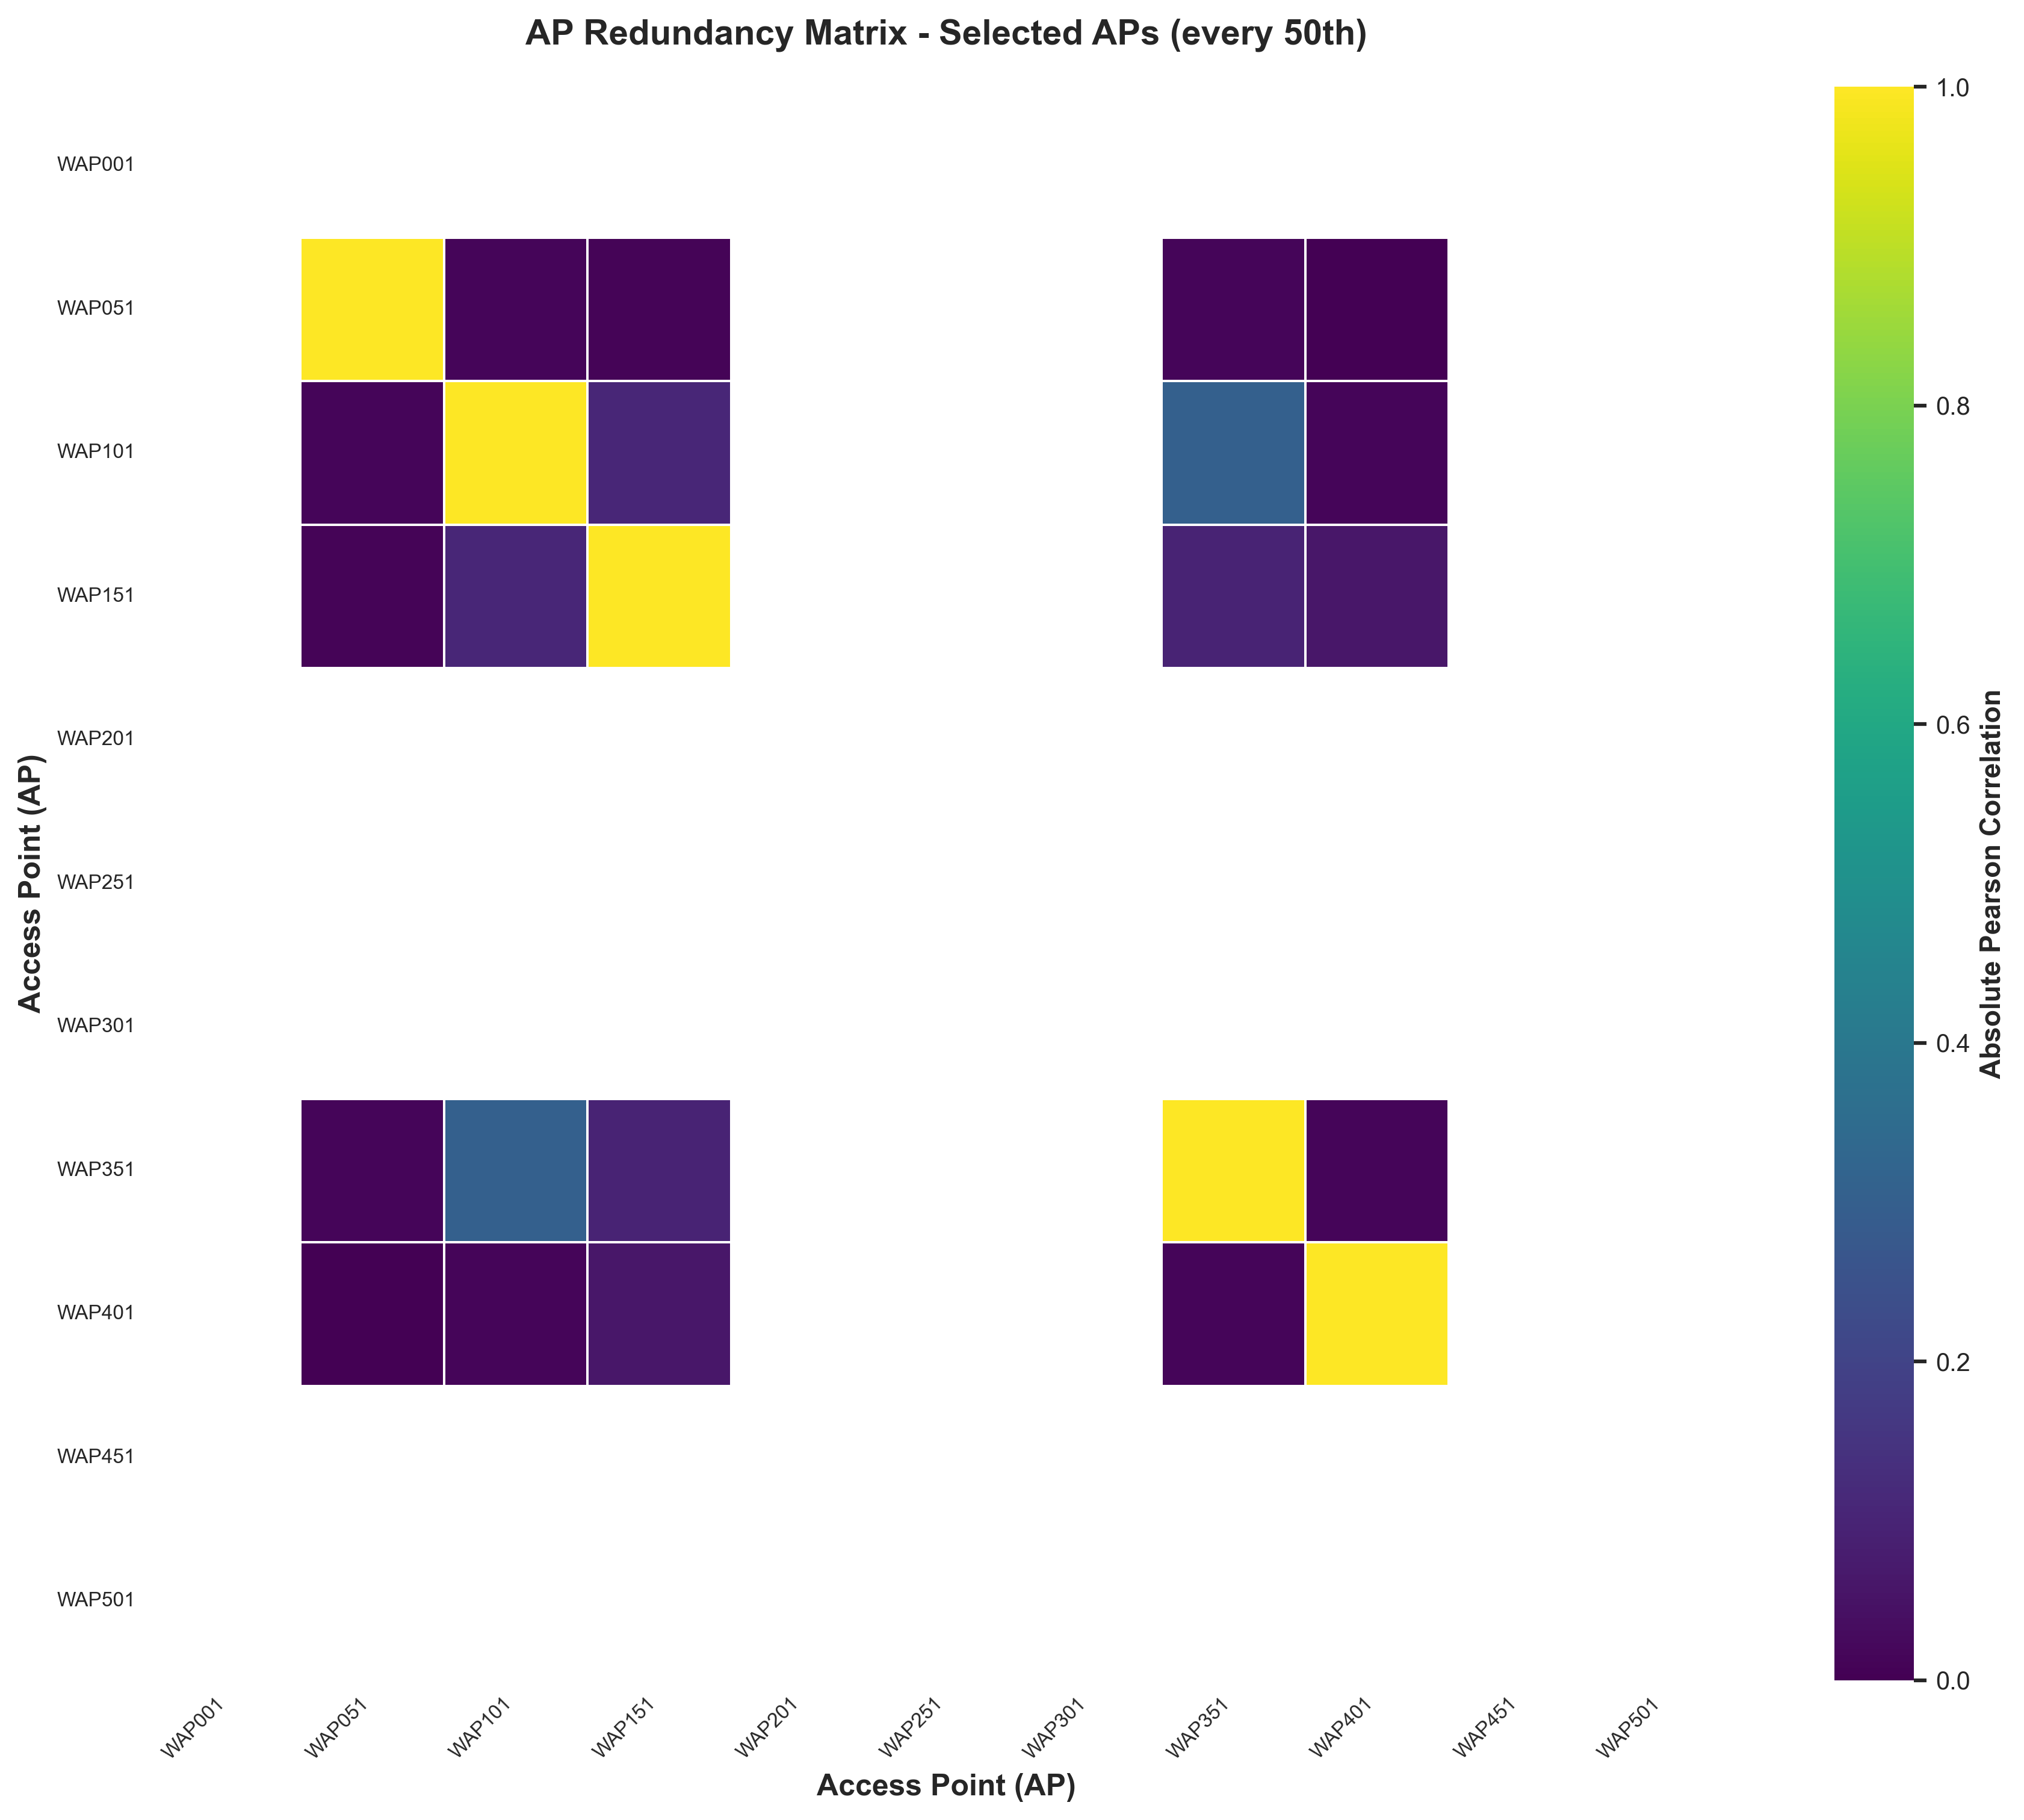

✓ Subset redundancy matrix saved: redundancy_matrix_subset.png


In [6]:
# Select a subset of APs for clearer visualization (every Nth AP)
# This will show the pattern more clearly with visible labels
step = 50  # Show every 50th AP
selected_aps = redundancy_df.index[::step]

# Create subset matrix
subset_df = redundancy_df.loc[selected_aps, selected_aps]

fig, ax = plt.subplots(figsize=(12, 10))

# Create heatmap with labels
sns.heatmap(
    subset_df,
    cmap='viridis',
    ax=ax,
    cbar_kws={'label': 'Absolute Pearson Correlation'},
    vmin=0,
    vmax=1,
    square=True,
    linewidths=0.5,
    linecolor='white',
    xticklabels=True,
    yticklabels=True
)

ax.set_xlabel('Access Point (AP)', fontsize=12, fontweight='bold')
ax.set_ylabel('Access Point (AP)', fontsize=12, fontweight='bold')
ax.set_title(f'AP Redundancy Matrix - Selected APs (every {step}th)', fontsize=14, fontweight='bold', pad=20)

# Rotate labels
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=8)
ax.set_yticklabels(ax.get_yticklabels(), rotation=0, fontsize=8)

# Add colorbar styling
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=10)
cbar.set_label('Absolute Pearson Correlation', fontsize=11, fontweight='bold')

plt.tight_layout()
plt.savefig(output_dir / 'redundancy_matrix_subset.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"✓ Subset redundancy matrix saved: redundancy_matrix_subset.png")

## High-Resolution Detailed View

Similar to your attached image with fine-grained resolution and visible AP labels.

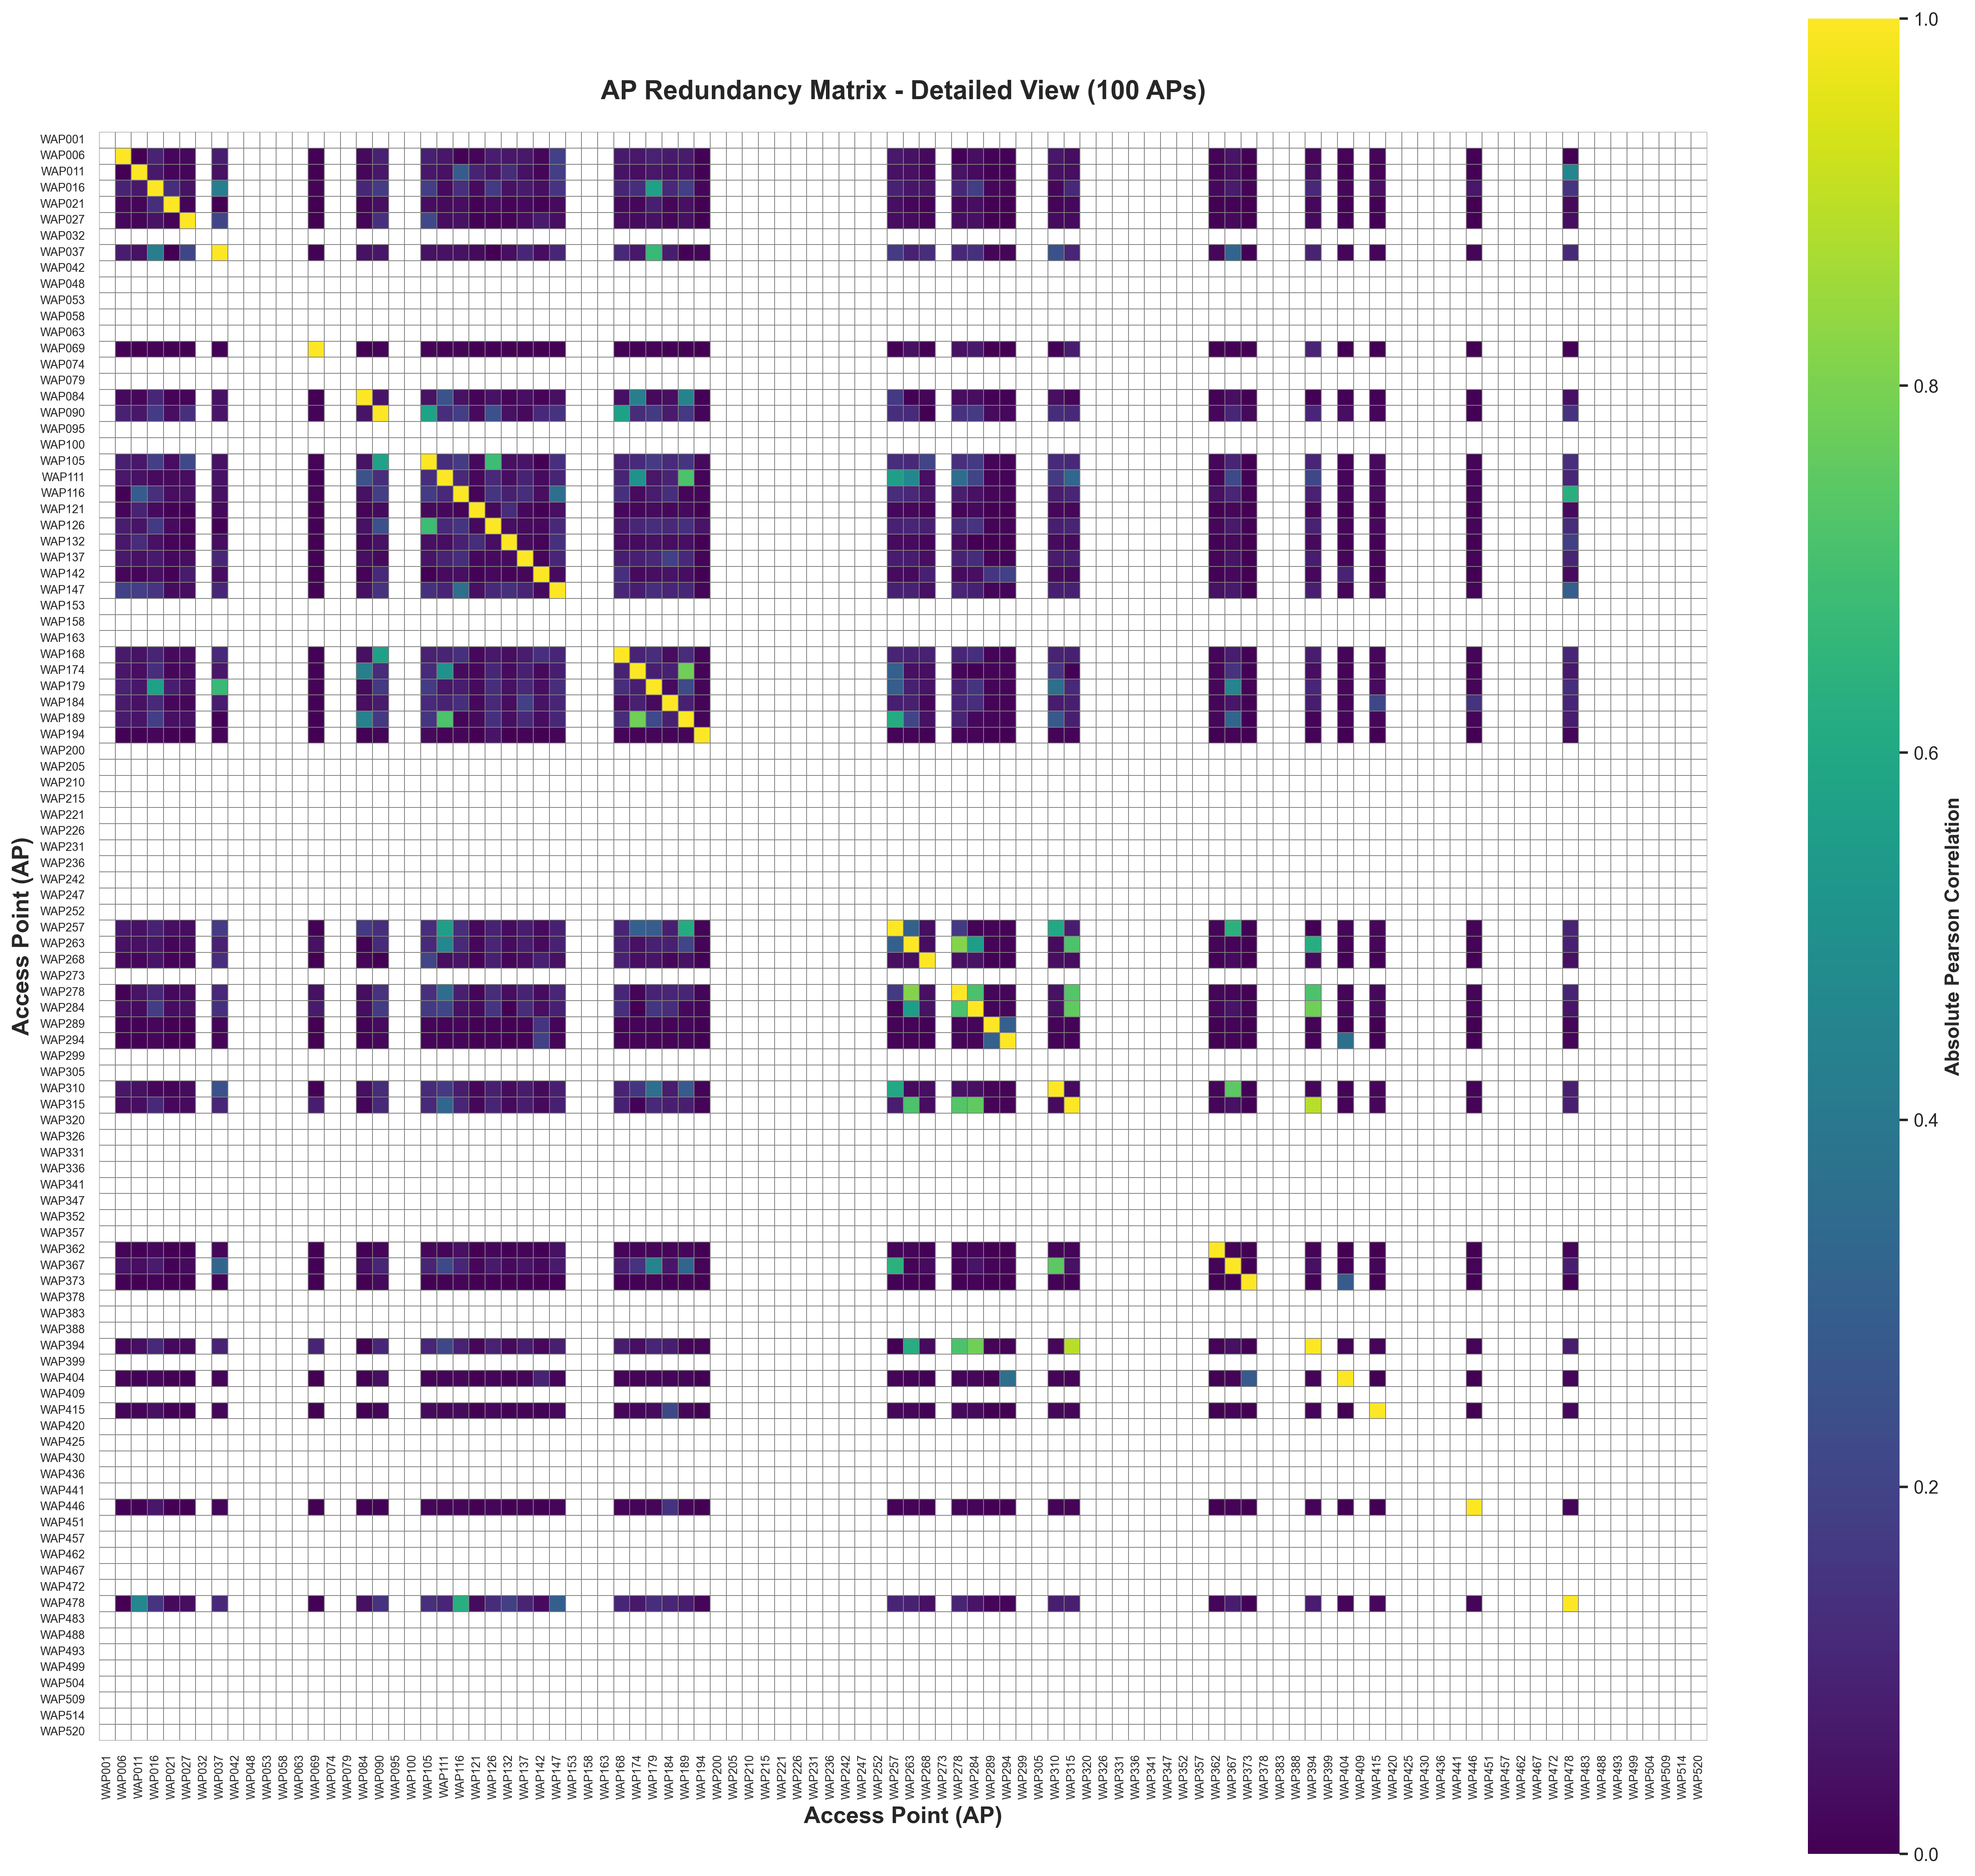

✓ Detailed redundancy matrix saved: redundancy_matrix_detailed.png


In [7]:
# Create a high-resolution version with AP labels on a smaller subset for clarity
# Select specific APs to display (adjustable based on needs)
n_aps_to_show = 100  # Number of APs to show for detailed view
selected_indices = np.linspace(0, len(redundancy_df)-1, n_aps_to_show, dtype=int)
selected_ap_names = redundancy_df.index[selected_indices]

# Create detailed subset
detailed_df = redundancy_df.iloc[selected_indices, selected_indices]
detailed_df.index = selected_ap_names
detailed_df.columns = selected_ap_names

fig, ax = plt.subplots(figsize=(18, 16))

# Create heatmap
sns.heatmap(
    detailed_df,
    cmap='viridis',
    ax=ax,
    cbar_kws={'label': 'Absolute Pearson Correlation'},
    vmin=0,
    vmax=1,
    square=True,
    linewidths=0.1,
    linecolor='gray',
    xticklabels=True,
    yticklabels=True
)

ax.set_xlabel('Access Point (AP)', fontsize=14, fontweight='bold')
ax.set_ylabel('Access Point (AP)', fontsize=14, fontweight='bold')
ax.set_title(f'AP Redundancy Matrix - Detailed View ({n_aps_to_show} APs)', 
             fontsize=16, fontweight='bold', pad=20)

# Rotate labels for better readability
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='center', fontsize=7)
ax.set_yticklabels(ax.get_yticklabels(), rotation=0, fontsize=7)

# Style colorbar
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=11)
cbar.set_label('Absolute Pearson Correlation', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.savefig(output_dir / 'redundancy_matrix_detailed.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"✓ Detailed redundancy matrix saved: redundancy_matrix_detailed.png")

## Redundancy Statistics Analysis

In [ ]:
# Analyze redundancy patterns
# Get upper triangle values (excluding diagonal)
mask = np.triu(np.ones_like(redundancy_df, dtype=bool), k=1)
upper_triangle_values = redundancy_df.where(mask).stack().values

# Create histogram of redundancy values
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Histogram
axes[0].hist(upper_triangle_values, bins=50, color='#2E86AB', alpha=0.7, edgecolor='black')
axes[0].set_xlabel('Absolute Pearson Correlation', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Frequency', fontsize=12, fontweight='bold')
axes[0].set_title('Distribution of AP Redundancy Values', fontsize=14, fontweight='bold')
axes[0].grid(True, alpha=0.3)
axes[0].axvline(upper_triangle_values.mean(), color='red', linestyle='--', 
                linewidth=2, label=f'Mean: {upper_triangle_values.mean():.3f}')
axes[0].axvline(np.median(upper_triangle_values), color='green', linestyle='--', 
                linewidth=2, label=f'Median: {np.median(upper_triangle_values):.3f}')
axes[0].legend(fontsize=11)

# Box plot
axes[1].boxplot(upper_triangle_values, vert=True, patch_artist=True,
                boxprops=dict(facecolor='#2E86AB', alpha=0.7),
                medianprops=dict(color='red', linewidth=2),
                whiskerprops=dict(linewidth=1.5),
                capprops=dict(linewidth=1.5))
axes[1].set_ylabel('Absolute Pearson Correlation', fontsize=12, fontweight='bold')
axes[1].set_title('Redundancy Value Distribution', fontsize=14, fontweight='bold')
axes[1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.savefig(output_dir / 'redundancy_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Redundancy distribution analysis saved: redundancy_distribution.png")

# Print statistics
print("\n" + "="*80)
print("REDUNDANCY VALUE STATISTICS")
print("="*80)
print(f"Mean: {upper_triangle_values.mean():.4f}")
print(f"Median: {np.median(upper_triangle_values):.4f}")
print(f"Std Dev: {upper_triangle_values.std():.4f}")
print(f"Min: {upper_triangle_values.min():.4f}")
print(f"Max: {upper_triangle_values.max():.4f}")
print(f"25th percentile: {np.percentile(upper_triangle_values, 25):.4f}")
print(f"75th percentile: {np.percentile(upper_triangle_values, 75):.4f}")

## Summary

In [ ]:
print("="*80)
print("REDUNDANCY MATRIX VISUALIZATION COMPLETE")
print("="*80)
print(f"\nAll figures saved to: {output_dir}")
print(f"  Resolution: 300 DPI")
print(f"  Format: PNG (publication-ready)")
print("\n" + "="*80)
print("GENERATED VISUALIZATIONS")
print("="*80)
print("  ✓ Full redundancy matrix heatmap (all APs)")
print("  ✓ Subset redundancy matrix (selected APs with labels)")
print("  ✓ Detailed view redundancy matrix (100 APs)")
print("  ✓ Redundancy value distribution analysis")
print("="*80)